# Image recognition

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

## Load digits data

In [8]:
digits = datasets.load_digits()

digits dataset contains a set of handwritten digits represented as $8$-by-$8$ matrices whose entries are digits pixels 

In [10]:
totdigits = digits.images.shape[0]
print('There are {} digits picture represented as {}x{} matrices'.format(totdigits,digits.images.shape[1],digits.images.shape[2]))


There are 1797 digits picture represented as 8x8 matrices


Let us show a sequence of digits

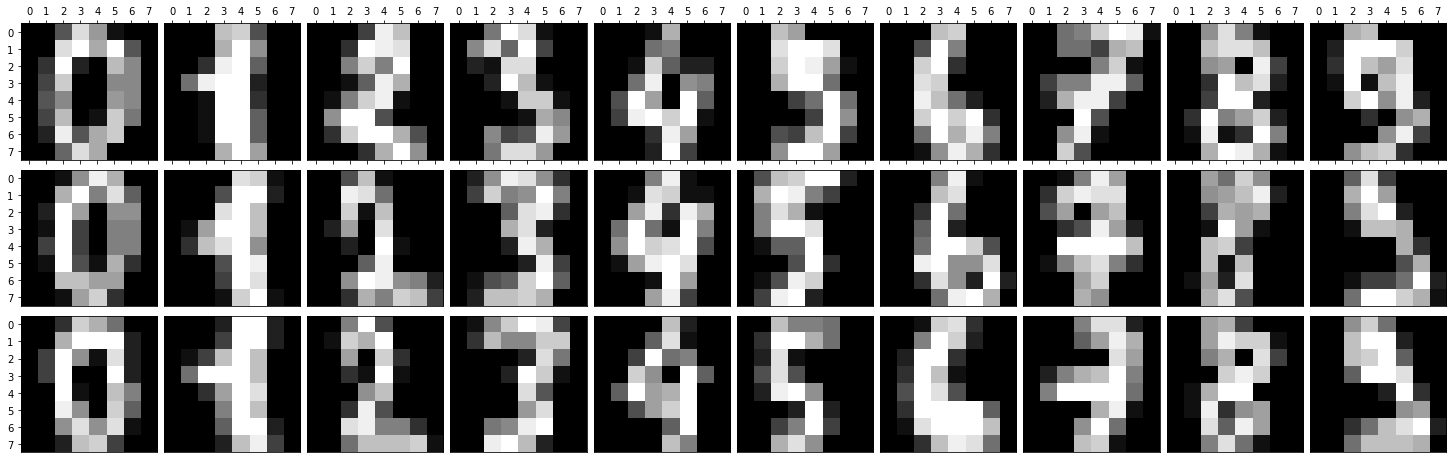

In [11]:
nrows = 3

fig, ax = plt.subplots(nrows, 10, figsize=(20, 6))
plt.gray() # use gray scale
fig.subplots_adjust(left=0.01, right=1, bottom=0, top=1,hspace=0.05, wspace=0.05)
for i in range(nrows):
    for j in range(10):
        ax[i,j].matshow( digits.images[i*10+j] ) 
        if i > 0: ax[i,j].set_xticks([])
        if j > 0: ax[i,j].set_yticks([])
    #endfor
#endfor

Data are organised as follows:
   - digits.images contains all $8$-by-$8$ 1797 matrices. In particular, digits are repeated every ten positions. For example:
     - digits.images[0], digits.images[10], digits.images[20], and so on, contain digits $0$;
     - digits.images[1], digits.images[11], digits.images[21], ans so on, contain digits $1$.
   - digits.data contains all 1797 matrices but stored as arrays; for example, digit.data[0] is a $1$-by-$8^2$ array of subsequent rows of digits.images[0].
   - digits.target_names contains the digit target outputs, i.e. $0,1,\dots,9$.

In [35]:
print('digits.images[0]:')
print( digits.images[0] )
print('\ndigits.data[0]:')
print( digits.data[0] )
print('\ndigits.target_names:')
print( digits.target_names )

digits.images[0]:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

digits.data[0]:
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

digits.target_names:
[0 1 2 3 4 5 6 7 8 9]


### Image recognition: a classification problem

Let us apply SVM to image recognition. In our case, **the value of each pixel of a digit image is considered as a feature**. We we will do is, given a digit image, represented as a matrix of pixels, we try to predict which right digit it represents (either $0$, $1$,..., or $9$).

The learning set is a (subgroup) of the labeled digits dataset. After we trained out model, we try to predict the label (the digit) of new (unseen) instances. As already said, pixels will be the features, i.e., the attributes where we have to learn from. 

First of all, we create a dataframe of digits dataset

In [36]:
# digit dataframe
digdf = pd.DataFrame(data=digits.data)

# add the target label
digdf['digit'] = digits.target

digdf.head(13)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,digit
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


$i$-th row of the dataframe is digits.data[$i$] (not considering the last entry, which represent the right digit label)

Double check: plot the first row of the dataframe (it is a $0$)

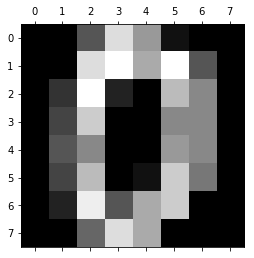

In [37]:
# double check: plot the first row of the dataframe
plt.matshow( digdf.drop(columns=['digit']).iloc[0,:].values.reshape(8,8) )
plt.show()

#### Take the mean of pixels for each label and plot them

In [84]:
meandig = digdf.groupby('digit').mean()
meandig

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
digit,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.022472,4.185393,13.095506,11.297753,2.926966,0.033708,0.000000,0.000000,0.887640,...,2.415730,0.000000,0.00000,0.005618,4.157303,13.561798,13.325843,5.438202,0.275281,0.000000
1,0.0,0.010989,2.456044,9.208791,10.406593,6.076923,0.994505,0.000000,0.000000,0.093407,...,2.049451,0.642857,0.00000,0.005495,2.241758,9.137363,13.027473,8.576923,3.049451,1.494505
2,0.0,0.932203,9.666667,14.186441,9.627119,2.384181,0.107345,0.000000,0.011299,5.276836,...,7.180791,0.711864,0.00565,0.943503,10.096045,13.966102,13.118644,11.796610,8.022599,1.932203
3,0.0,0.644809,8.387978,14.169399,14.224044,7.480874,0.786885,0.005464,0.010929,4.207650,...,5.928962,0.065574,0.00000,0.502732,9.316940,14.650273,13.972678,8.672131,1.409836,0.065574
4,0.0,0.000000,0.453039,7.055249,11.497238,2.011050,0.209945,0.127072,0.000000,0.060773,...,0.022099,0.000000,0.00000,0.022099,0.552486,7.812155,11.812155,1.955801,0.000000,0.000000
5,0.0,0.967033,9.983516,13.038462,13.895604,12.181319,4.142857,0.043956,0.005495,3.895604,...,1.335165,0.000000,0.00000,0.956044,10.664835,14.736264,9.362637,2.532967,0.197802,0.000000
6,0.0,0.000000,1.138122,11.165746,9.585635,1.447514,0.011050,0.000000,0.000000,0.033149,...,10.779006,0.524862,0.00000,0.000000,1.436464,10.685083,15.093923,13.044199,4.480663,0.093923
7,0.0,0.167598,5.100559,13.061453,14.245810,11.027933,5.189944,1.000000,0.000000,1.094972,...,0.000000,0.000000,0.00000,0.122905,6.391061,11.659218,2.206704,0.011173,0.000000,0.000000
8,0.0,0.143678,5.022989,11.603448,12.402299,6.235632,0.528736,0.000000,0.028736,1.977011,...,2.316092,0.005747,0.00000,0.143678,5.005747,12.695402,13.011494,6.735632,1.206897,0.011494


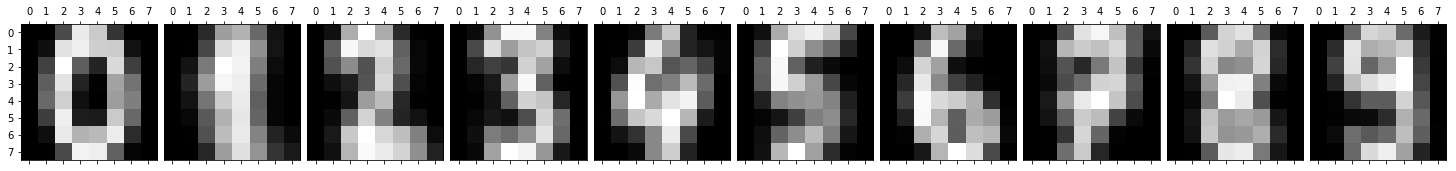

In [85]:
fig, ax = plt.subplots(1, 10, figsize=(20, 5))
ax.flatten()

plt.gray() # use gray scale
fig.subplots_adjust(left=0.01, right=1, bottom=0, top=1,hspace=0.05, wspace=0.05)

for j in range(10):
    ax[j].matshow( bb.iloc[j,:].values.reshape(8,8) ) 
    if j > 0: ax[j].set_yticks([])
#endfor

### Logistic regression, SVM, and kNN

Since we are facing a classification problem, let us build the model for image recognition using logistic regression, SVM, and kNN 

In [86]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(digdf.drop(columns="digit"),digdf['digit'], random_state=0) 
print(X_train.shape)
print(X_test.shape)

(1347, 64)
(450, 64)


In [88]:
def imageclf(X_train,y_train,X_test,y_test,nameclf,summary=None):
    if nameclf == 'logistic':
        # logistic regression classifier
        print('** Logistic regression classifier **')
        clf = LogisticRegression(solver='newton-cg',multi_class='ovr')    
    elif nameclf == 'svm':
        # support vector machine classifier
        print('** Support vector machine classifier **')
        clf = SVC(kernel='linear', gamma='auto')
    else:
        # k-nearest neighbours
        print('** k Nearest Neighbour classifier **')
        clf = KNeighborsClassifier(n_neighbors=15)
    #endif 
    clf.fit(X_train,y_train)           # training 
    y_pred = clf.predict(X_test)       # prediction of the test set 
    score  = clf.score(X_test,y_test)  # score
    if summary is None:
        print('Score:      {:.2f}%'.format(score*100))
        print('Confusion matrix:')
        print(metrics.confusion_matrix(y_test,y_pred))
        print('\n')
    #endif
    return clf
#endfunction

clf = imageclf(X_train,y_train,X_test,y_test,'logistic')
clf = imageclf(X_train,y_train,X_test,y_test,'svm')
clf = imageclf(X_train,y_train,X_test,y_test,'knn')

** Logistic regression classifier **
Score:      95.11%
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  1  0  3  0]
 [ 0  0 42  2  0  0  0  0  0  0]
 [ 0  0  1 44  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  2  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  2 43]]


** Support vector machine classifier **
Score:      97.11%
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  1  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  1  0  1  0  0  1 44]]


** k Nearest Neighbour classifier **
Score:      97.11%
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  1  0  0  0]
 [ 1  0 42  0  0  0  0  1  0  0]
 [ 0  0  0

Overall, we see that SVM and kNN perform better than logistic regression. In particular, digit $0$ is correctly classified in almost all cases (just one missclassification in kNN). 

We recall that the $(i,j)$ of the confusion matrix denotes the number of instances of digit $i$ that are classified as digit $j$ (i.e., wrong classification), $i,j=0,\dots,9$. 
For example, in the logistic regression we see that there are $4$ wrong classification of digit $1$: one digit $1$ classified as $6$ and three digits $1$ classified as $8$. 

Let us have a look at some of these wrong classifications.

#### Select wrong classifications

In [216]:
X_train, X_test, y_train, y_test = train_test_split(digdf.drop(columns="digit"), digdf['digit']) 
clf = imageclf(X_train,y_train,X_test,y_test,'logistic') #,summary=0)
y_pred = clf.predict(X_test)

** Logistic regression classifier **
Score:      95.33%
Confusion matrix:
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  1  0  1  2  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 48  0  1  0  2]
 [ 0  0  0  0  0  1 46  0  0  0]
 [ 0  0  0  0  0  0  0 43  1  1]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  2  0  0  0  2  2 36]]




In [217]:
def getwrongpred(rightdig, wrongpred, y_test, y_pred):
    arr1 = np.c_[ np.array(y_test.index), np.array(y_test), np.array(y_pred)] 
    arr2 = arr1[ arr1[:,1] == rightdig,  :]
    wp   = arr2[ arr2[:,2] == wrongpred, 0]
    return wp
#endfunc

In [223]:
rightdig  = 9    # the right digit
wrongpred = 7    # the wrong classification
wp = getwrongpred(rightdig, wrongpred, y_test, y_pred)

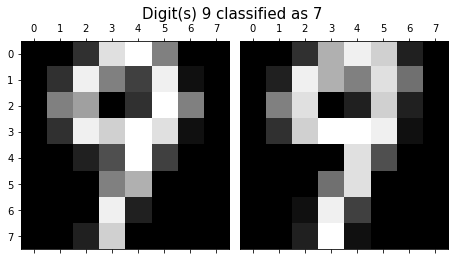

In [225]:
# Plot 
#plt.gray() # use gray scale

if len(wp) > 1:
    fig, ax = plt.subplots(1, len(wp))
    ax.flatten()
    fig.subplots_adjust(left=0.01, right=1, bottom=0, top=1.0,hspace=0.05, wspace=0.05)
    for j in range(len(wp)):
        ax[j].matshow( digdf.iloc[wp[j],:-1].values.reshape(8,8) ) 
        if j > 0: ax[j].set_yticks([])
    #endfor
else:
    plt.matshow( digdf.iloc[wp,:-1].values.reshape(8,8) ) 
#endif
plt.suptitle('Digit(s) {} classified as {}'.format(rightdig,wrongpred),fontsize=15)
plt.show()

--------------------------------

## Face recognition

In [243]:
faces = datasets.fetch_olivetti_faces()

The dataset contains $400$ images of $40$ different persons. The photos were taken under different light conditions and with facial expressions, including open/closed eyes, with glasses/no glasses, and smiling/not smiling. 

Similarly to digits dataset, 
   - faces.images contain the $400$ images represented as $64$-by-$64$ pixel matrices;
   - faces.data contains the same $400$ images but as array of $64^2=4096$ pixels;
   - face.target is an array of labels (or target people), ranging from 0 to 39.

In [242]:
print('Number of people (faces):', len(np.unique(faces.target)))
print('Number of images:        ', len(faces.data))

Number of people (faces): 40
Number of images:         400


In [246]:
# Observe that data are normalised (i.e., matrices values between 0 and 1)
print('Min and max: {} and {}'.format(np.min(faces.data), np.max(faces.data)))

Min and max: 0.0 and 1.0


Let us print the ($10$) images of the first $4$ people in the dataset

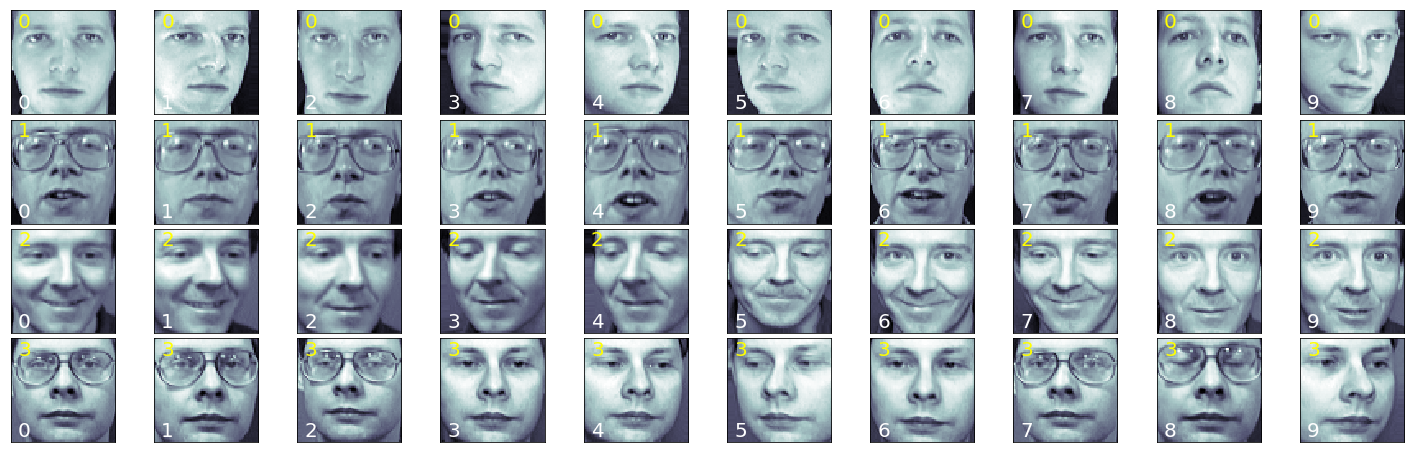

In [380]:
def printfaces(img, target, npeople):
    fig, ax = plt.subplots(npeople, 10, figsize=(20, 6))
    #plt.gray() # use gray scale
    fig.subplots_adjust(left=0.01, right=1, bottom=0, top=1,hspace=0.05, wspace=0.05)
    for i in range(npeople):
        for j in range(10):
            ax[i,j].matshow( img[i*10+j] , cmap=plt.cm.bone) 
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            # target number i*10+j
            ax[i,j].text(4, 10, str(target[i*10+j]), color='yellow', fontsize=20) 
            # j-th image of people number i*10+j
            ax[i,j].text(4, 60, str(j), color='white', fontsize=20)              
        #endfor
    #endfor
#endfunction

printfaces(faces.images, faces.target, 4)

#### Create a dataframe with the images 

In [287]:
# digit dataframe
facesdf = pd.DataFrame(data=faces.data)

# add the target label
facesdf['person'] = faces.target

facesdf.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,person
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [361]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(facesdf.iloc[:,:-1], facesdf['person'], random_state=0) 
print(X_train.shape)
print(X_test.shape)

(300, 4096)
(100, 4096)


#### Classification using SVM 

In [397]:
# SVM with linear kernel
clf = SVC(kernel='linear', gamma='auto')
clf.fit(X_train,y_train)           # training 
y_pred = clf.predict(X_test)       # prediction of the test set 
score  = clf.score(X_test,y_test)  # score
    
print('Score:      {:.2f}%'.format(score*100))
print('Confusion matrix:')
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

Score:      99.00%
Confusion matrix:
[[6 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


We see that the $99\%$ of the new instances (unseen faces not used to train the svm) have been correctly classified

In [398]:
# find entries of the confusion matrix outside the diagonal
i,j = np.where(cm)
idx = np.c_[i,j]

miscidx = np.where( np.diff( idx ) )[0]
# len(miscidx): returns the total number of entris outside the diagonal 

# number of misclassifications
nofmisc = cm[ idx[miscidx,0],  idx[miscidx,1] ]

print('Person {} classified as person {} ({} time(s))' .format(idx[miscidx,0], idx[miscidx,1], nofmisc) )   

Person [7] classified as person [0] ([1] time(s))


In [399]:
def getwrongpred(rightdig, wrongpred, y_test, y_pred):   
    arr1 = np.c_[ np.array(y_test.index), np.array(y_test), np.array(y_pred)] 
    arr2 = arr1[ arr1[:,1] == rightdig,  :]
    wp   = arr2[ arr2[:,2] == wrongpred, 0]
    return wp
#endfunc

rightdig  = 7    # the right person
wrongpred = 0    # the wrong classfication
wp = getwrongpred(rightdig, wrongpred, y_test, y_pred)

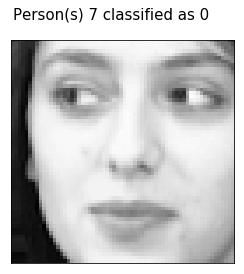

In [400]:
if len(wp) > 1:
    fig, ax = plt.subplots(1, len(wp))
    ax.flatten()
    fig.subplots_adjust(left=0.01, right=1, bottom=0, top=1.0,hspace=0.05, wspace=0.05)
    for j in range(len(wp)):
        ax[j].matshow( facesdf.iloc[wp[j],:-1].values.reshape(faces.images.shape[1:3]) ) 
        if j > 0: ax[j].set_yticks([])
    #endfor
else:
    plt.matshow( facesdf.iloc[wp,:-1].values.reshape(faces.images.shape[1:3])) 
    plt.xticks([]), plt.yticks([])
#endif
plt.suptitle('Person(s) {} classified as {}'.format(rightdig,wrongpred),fontsize=15)
plt.show()